In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "Vx7hZtK33csrtkim9K08oGoHM"
Consumer_Secret_Key = "U6vifaTOGQaEqppk9QP986QrHlrXdYYxCkxVBV3mTSihjuTftR"
Access_Token = "1137001755428810752-8QdkP3W4Z93EGEdLPRIEGL0MbUNnMC"
Access_Token_Secret = "Zwz5IZzr5zFuiPtviPASDkyuNsf9KZe8HTfmAuwN4ZZ2K"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [4]:
posts = api.user_timeline(screen_name = "Tokopedia", count = 500, tweet_mode = "extended")

print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
  print(str(1)+')'+ tweet.full_text+ '\n')
  i=i+1

Show the 5 recent tweets:

1)@Klik49626089 Halo Toppers, Kami sarankan Kakak untuk laporkan kendalanya melalui DM ya. Ditunggu ya Kak :)

1)@hoomanisasi Hai Toppers, Mohon maaf atas ketidaknyamanannya. Boleh infokan detail pertanyaan atau kendalanya melaui DM untuk kami bantu lakukan pengecekan. Ditunggu konfirmasinya ya Kak :)

1)@manusiaperrasa Halo Toppers, Kami sarankan Kakak untuk laporkan kendalanya melalui DM ya Kak. Ditunggu ya Kak :)

1)@disuruhjeje Untuk info lebih lanjut Kakak bisa cek melalui link berikut: https://t.co/raRNO3NI4o dan  https://t.co/YReq22tgSD. Semoga infonya membantu ya Kak.

1)@disuruhjeje Tita sampaikan bahwa Tokopedia melarang pihak Penjual untuk menjual produk nonfisik yang pengiriman barangnya tidak dapat melalui jasa ekspedisi sehingga tidak dapat dilakukan pengawasan oleh Tokopedia ya Kak.



In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,"@Klik49626089 Halo Toppers, Kami sarankan Kaka..."
1,"@hoomanisasi Hai Toppers, Mohon maaf atas keti..."
2,"@manusiaperrasa Halo Toppers, Kami sarankan Ka..."
3,@disuruhjeje Untuk info lebih lanjut Kakak bis...
4,@disuruhjeje Tita sampaikan bahwa Tokopedia me...


In [6]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\s+', '', text)
  return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,"Halo Toppers, Kami sarankan Kakak untuk lapor..."
1,"Hai Toppers, Mohon maaf atas ketidaknyamanann..."
2,"Halo Toppers, Kami sarankan Kakak untuk lapor..."
3,Untuk info lebih lanjut Kakak bisa cek melalu...
4,Tita sampaikan bahwa Tokopedia melarang pihak...
...,...
195,"Terimakasih sudah menghubungi Tokopedia Care,..."
196,Sepatu PUMA bakalan Diskon hingga 85% di Play1...
197,Di DiskonVaganza TokopediaPlay hari ini ada VA...
198,"Yuk, gabung di Webinar “Bangkit Bersama Progra..."


In [7]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,subjectivity,Polarity
0,"Halo Toppers, Kami sarankan Kakak untuk lapor...",1.00,0.500000
1,"Hai Toppers, Mohon maaf atas ketidaknyamanann...",1.00,0.500000
2,"Halo Toppers, Kami sarankan Kakak untuk lapor...",1.00,0.500000
3,Untuk info lebih lanjut Kakak bisa cek melalu...,0.00,0.000000
4,Tita sampaikan bahwa Tokopedia melarang pihak...,0.00,0.000000
...,...,...,...
195,"Terimakasih sudah menghubungi Tokopedia Care,...",0.00,0.000000
196,Sepatu PUMA bakalan Diskon hingga 85% di Play1...,0.00,0.000000
197,Di DiskonVaganza TokopediaPlay hari ini ada VA...,0.00,-0.013021
198,"Yuk, gabung di Webinar “Bangkit Bersama Progra...",0.75,0.000000


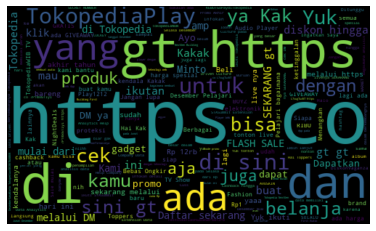

In [8]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,subjectivity,Polarity,Analysis
0,"Halo Toppers, Kami sarankan Kakak untuk lapor...",1.00,0.500000,positive
1,"Hai Toppers, Mohon maaf atas ketidaknyamanann...",1.00,0.500000,positive
2,"Halo Toppers, Kami sarankan Kakak untuk lapor...",1.00,0.500000,positive
3,Untuk info lebih lanjut Kakak bisa cek melalu...,0.00,0.000000,neutral
4,Tita sampaikan bahwa Tokopedia melarang pihak...,0.00,0.000000,neutral
...,...,...,...,...
195,"Terimakasih sudah menghubungi Tokopedia Care,...",0.00,0.000000,neutral
196,Sepatu PUMA bakalan Diskon hingga 85% di Play1...,0.00,0.000000,neutral
197,Di DiskonVaganza TokopediaPlay hari ini ada VA...,0.00,-0.013021,negative
198,"Yuk, gabung di Webinar “Bangkit Bersama Progra...",0.75,0.000000,neutral


In [10]:
print('Negative tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Negative tweets:

1) Biar liburan gak mati gaya, yuk cari kado akhir tahun.
Isi liburan dengan berbagai game seru dari Tokopedia &gt;&gt; 
https://t.co/yT2I3JlJOi
KadoAkhirTahun Hobi

2) AAHH bakalan ada Second Chance buat kamu menangin Giveaway Photocard TWICE, STRAY KIDS, ITZY, THE BOYZ dan SECRET NUMBER! Ayo, langsung aja ke link ini buat cari tahu cara dapetinnya &gt; https://t.co/0wpUdvonIy 
KpopWave TokopediaPlay

3) Perhatian untuk Bestie Minto! Ada Cuci Gudang Gadget bareng Mas Taufik Nobo di NightDeals. GRATIS Vacuum juga lagi. Buruan ikutan dehh &gt; 
https://t.co/HhH7mHAHFl
TokopediaPlay

4) ARMY! Mau instax mini 11 BTS Butter version? 💜💛
Kamu bisa dapatkan Limited Package berisi Instax Mini 11 BTS Butter, Shoulder Strap, Shutter Accessories (Jewel &amp; Butter). Cek di sini &gt;&gt; https://t.co/RGqv8QQL5M BTS Instax

5) Waktu Indonesia Belanja TV Show Spesial Promo Akhir Tahun! Ada penampilan dari SECRET NUMBER, THE BOYZ, Raisa, RAN, Mahalini, dan penampilan spesial lainny

In [11]:
print('Positive tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Positive tweets:

1)  Halo Toppers, Kami sarankan Kakak untuk laporkan kendalanya melalui DM ya. Ditunggu ya Kak :)

2)  Hai Toppers, Mohon maaf atas ketidaknyamanannya. Boleh infokan detail pertanyaan atau kendalanya melaui DM untuk kami bantu lakukan pengecekan. Ditunggu konfirmasinya ya Kak :)

3)  Halo Toppers, Kami sarankan Kakak untuk laporkan kendalanya melalui DM ya Kak. Ditunggu ya Kak :)

4) Special Anniversary Deals! Dapatkan makanan dari Oma Elly dengan diskon hingga 50% + Bebas Ongkir. Yuk jajan sekarang! &gt; https://t.co/JeOdb80oNW
OmaElly FnB

5)  Kami tunggu konfirmanya melalui DM ya Kak :)

6) _mild Hai Kak Ska, untuk pertanyaannya sudah Kami bantu jawab melalui DM ya. Cek DM-nya yuk :)

7) ((LIVE NOW)) Nonton sekarang juga di: https://t.co/hXSSRAQ3x4 🙏🙏 https://t.co/JFfQwL3WTv

8)  Hai Kak Cindy, Yuk infokan detail kendala Kakak melalui DM agar dapat kami bantu cek ya Kak. Kami tunggu konfirmasinya ya :)

9) Main tebak gambar di WARNET TokopediaPlay siang ini yuuuk! 

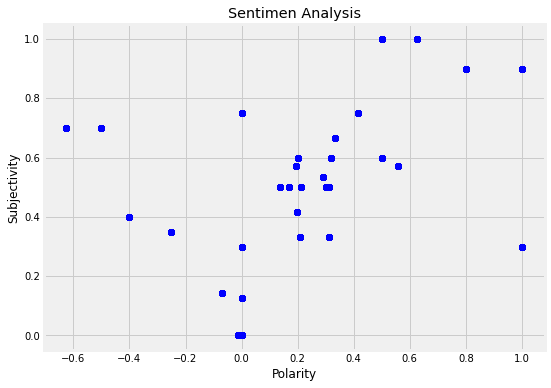

In [12]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'], df['subjectivity'], color='b')

plt.title('Sentimen Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [13]:
potweets = df[df.Analysis == 'positive']
potweets = potweets['Tweets']

round ( (potweets.shape[0] / df.shape[0]) *100, 1)

24.5

In [14]:
netweets = df[df.Analysis == 'negative']
netweets = netweets['Tweets']

round ( (netweets.shape[0] / df.shape[0]) *100, 1)

5.0

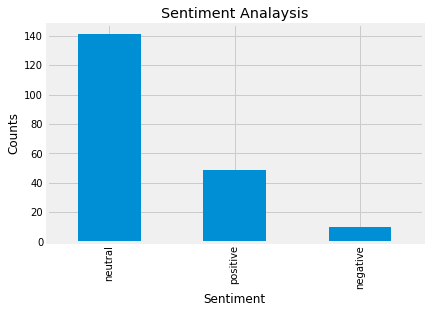

In [15]:
df['Analysis'].value_counts()

plt.title('Sentiment Analaysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()